In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Kenkoku no kane,1928
1,Vsyo nachinayetsya s lyubvi,1984
2,Expendable Assets,2016
3,Stardust Serenade,2006
4,Only One Way to Kill a Zombie,2010


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

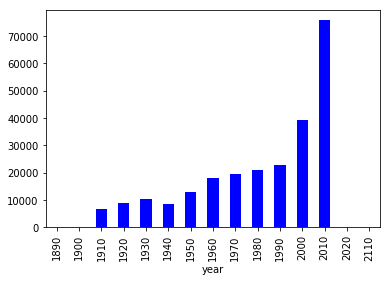

In [4]:
titles.groupby(titles.year//10 * 10).count()['title'].plot(kind='bar', color='blue')

### Use groupby() to plot the number of "Hamlet" films made each decade.

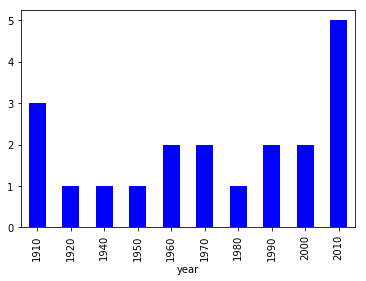

In [5]:
titles[titles.title == 'Hamlet'].groupby(titles.year//10 * 10).count()['title'].plot(kind='bar', color='blue')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [6]:
cast[(cast.year//10==195) & (cast.n==1)].groupby(['year', 'type']).count()['name'].unstack()

type,actor,actress
year,,
1950,625,288
1951,651,285
1952,613,304
1953,664,312
1954,636,316
1955,648,285
1956,668,307
1957,739,315
1958,715,301


### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [7]:
cast[(cast.year//10 == 195) & (cast.n<=5)].groupby(['n', 'type']).count()['name'].unstack()

type,actor,actress
n,,
1.0,6692,3040
2.0,4640,4635
3.0,5654,3201
4.0,5663,2881
5.0,5674,2592


### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [8]:
cast[cast.title == 'The Pink Panther'].groupby('year').count()['character']

year
1963    21
2006    90
Name: character, dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [9]:
more_than_1_role = cast[cast.name == 'Frank Oz'].groupby(['year', 'title']).size()

In [10]:
more_than_1_role[more_than_1_role>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [11]:
frank_char_count = cast[cast.name == 'Frank Oz'].groupby('character').size()

In [12]:
frank_char_count[frank_char_count>=2]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64